<center>
    <img src="https://i.itworldcanada.com/wp-content/uploads/2023/08/GettyImages-1448152453-696x391.jpg" width='30%'> 
</center>

----------

<h1 align="center"> Machine Learning Capstone Project </h1>
<br>
<center align="center"> <font size='4'>  Presented by: </font><font size='4' color='#33AAFBD'>Pascal, Narayan & Pierre </font></center>
<br>

----------

# Table of Contents

    1. Data Preparation
    2. Data Exploration
    3. Model Baseline
    4. Feature Preparation
    5. Model Tuning
    6. Model Interpretation
    7. Model Deployment

# Objective

This notebook represents a comprehensive Machine Learning Capstone Project focused on credit card fraud detection. The project follows a systematic approach to building a predictive model. The workflow begins with data preparation, where relevant datasets are loaded and consolidated. An initial exploration provides insights into the structure and content of the data. A baseline model, using logistic regression, is then established to serve as a foundation for subsequent improvements. 

The project delves deeper into model tuning, employing techniques such as hyperparameter optimization and feature engineering to enhance performance. The notebook culminates in the model deployment phase, demonstrating how the trained model can be saved, loaded, and utilized for future predictions. The overarching goal is to devise an effective machine learning model to detect potentially fraudulent credit card transactions.

# Dataset Information

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

Source of Simulation
This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

Link: https://www.kaggle.com/datasets/kartik2112/fraud-detection/data 

### Import Necessary Libraries

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [3]:
df_train = pd.read_csv('CC_fraudTrain.csv')
df_test = pd.read_csv('CC_fraudTest.csv')

In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)

# EDA

### Data Exploration

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [7]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.')

There are 1852394 rows and 23 columns in this dataset.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [9]:
# Identify and view duplicate rows
duplicateRows = df[df.duplicated()]

duplicateRows

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [10]:
# Check for missing values in the dataset
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Descriptive statistics to understand data distribution
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Transaction Amount (amt):

The average transaction amount in the dataset is approximately $ 70.63.

The minimum transaction amount is approximately $ 1.00.

The maximum transaction amount in the dataset is approximately $ 28,948.90.

Fraudulent Status (is_fraud):
This is our target variable. On average, 0.52 percent of transactions in the dataset are fraudulent and it indicate an highly imbalanced dataset.

### Data Cleaning

In [12]:
# Dropping the Unnamed:0 column from the dataframe
df.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
# Convert trans_date and dob into datetime format
# Creating'trans_date' feature and converting it to datetime datatype 
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])
df["age"] = df["trans_date"].dt.year - df["dob"].dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

#### Data Visualization

In [15]:
fraudulent_data = df[df['is_fraud'] == 1]

In [16]:
fraudulent_data['amt'].value_counts().sum()

9651

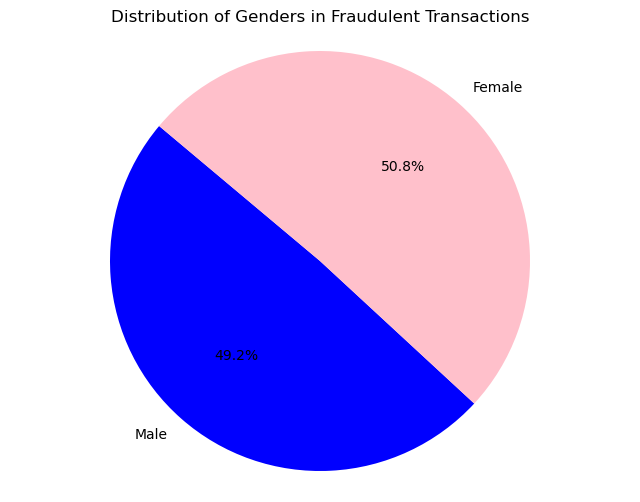

In [17]:
# Create a pie chart to visualize the distribution of genders with percentage values
gender_counts = fraudulent_data['gender'].value_counts()
male_count = gender_counts.get('M', 0)
female_count = gender_counts.get('F', 0)

labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['blue', 'pink']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genders in Fraudulent Transactions')
plt.axis('equal')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

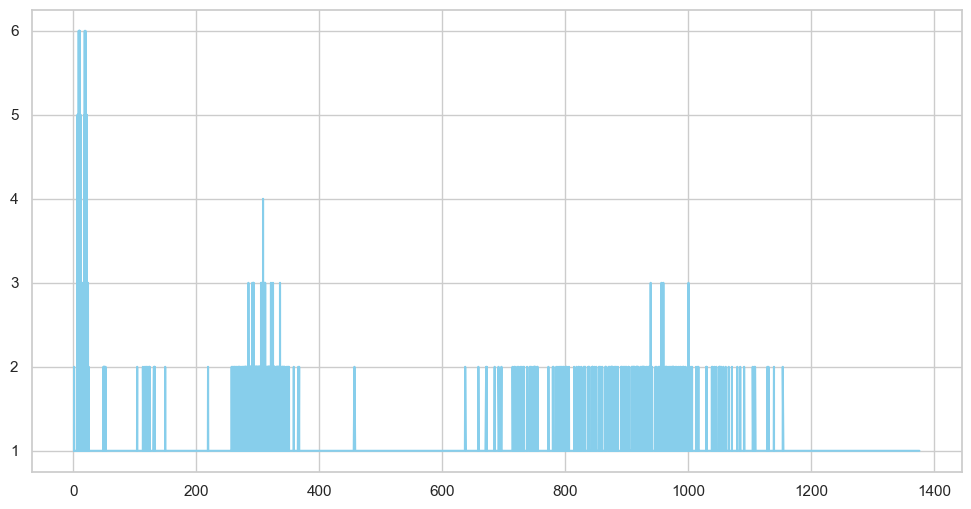

In [18]:
# Line chart for the distribution of transaction amounts in the dataset
unique_amts_counts = fraudulent_data['amt'].value_counts().reset_index()
unique_amts_counts.columns = ['amt', 'count']

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.lineplot(data=unique_amts_counts, x='amt', y='count', color='skyblue')
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=14)
plt.grid(False)
plt.show()

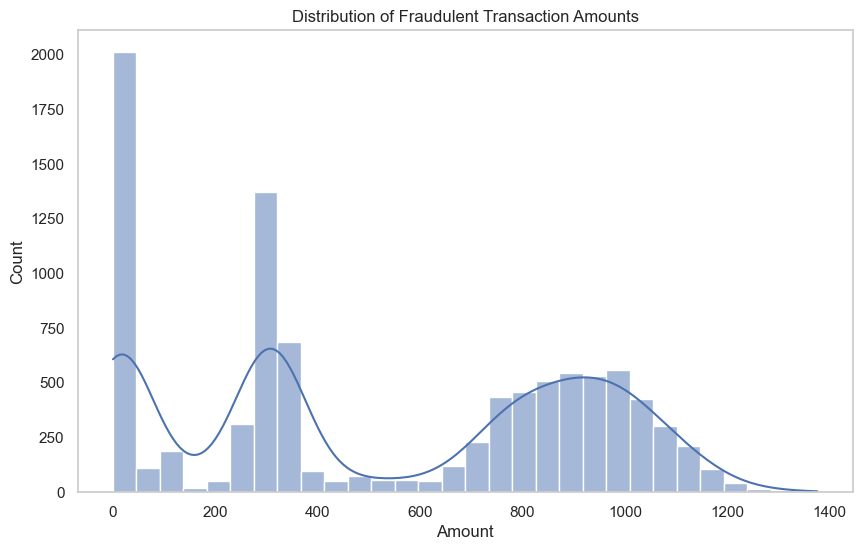

In [19]:
# Plotting the distribution of fraudulent amounts in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_data['amt'], bins=30, kde=True)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')

plt.grid(False)
plt.show()

Transaction Amount Distribution:


Most transactions are of relatively small amounts, with a peak below $100.

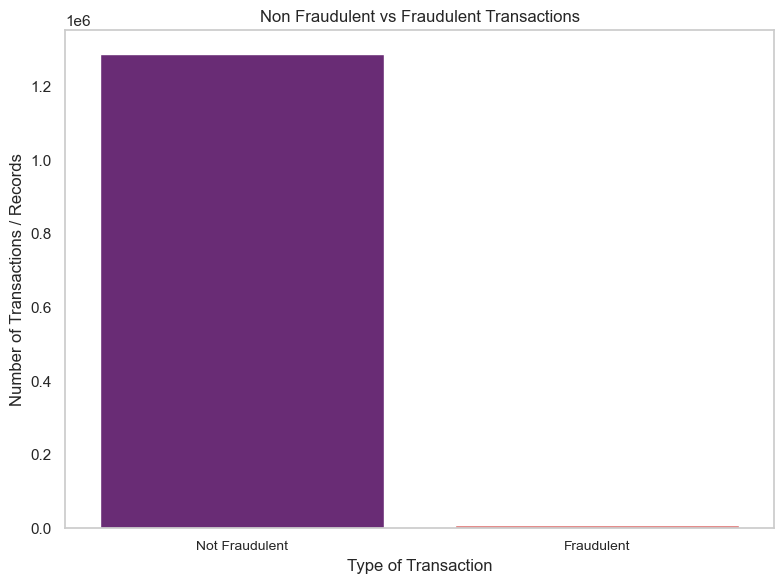

In [20]:
# Plotting the distribution of fraudulent vs non fraudulent records in the dataset
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_train, palette='magma')
ax.set_title('Non Fraudulent vs Fraudulent Transactions', fontsize=12)
ax.set_xlabel('Type of Transaction')
ax.set_ylabel('Number of Transactions / Records')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Fraudulent', 'Fraudulent'], fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Fraudulent vs Non Fraudulent Transactions:


The dataset is highly imbalanced, with a very small proportion of transactions being labeled as fraudulent.

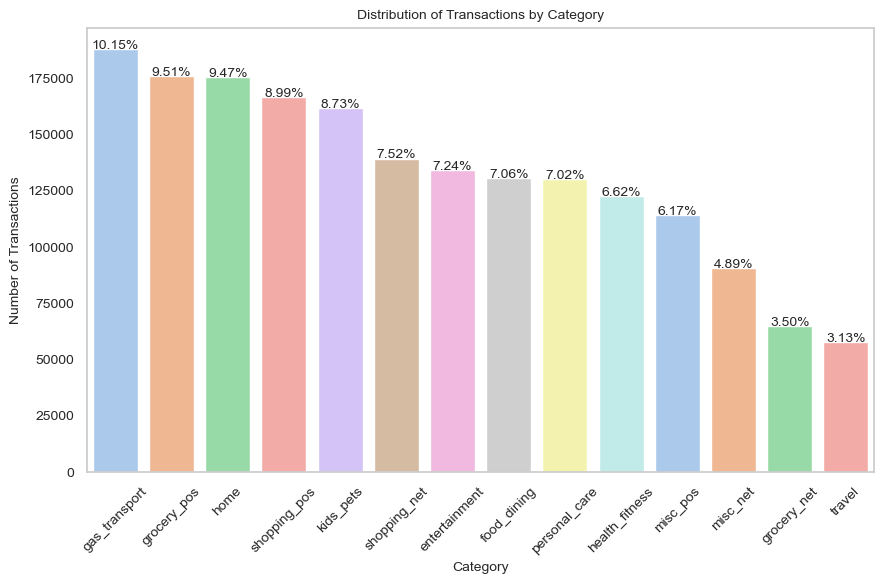

In [21]:
# Create a bar plot for the distribution of transactions by category
category_counts = df['category'].value_counts()
total_transactions = len(df)
category_percentages = (category_counts / total_transactions) * 100
sorted_categories = category_counts.index.tolist()

plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=sorted_categories, y=category_counts, palette='pastel')
plt.xlabel("Category",fontsize=10)
plt.ylabel("Number of Transactions",fontsize=10)
plt.title("Distribution of Transactions by Category",fontsize=10)
plt.xticks(rotation=45,fontsize=10)
ax.tick_params(axis='y', labelsize=10)

# Calculating the percentage of transacations in each category
for i, count in enumerate(category_counts):
    percentage = category_percentages[i]
    plt.text(i, count + 20, f"{percentage:.2f}%", ha='center',fontsize=10)

ax.xaxis.grid(False) 
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

Transactions Across Categories:


The gas_transport category has the highest number of transactions, followed by grocery_pos and home.
Some categories like travel and grocery_net have comparatively fewer transactions.

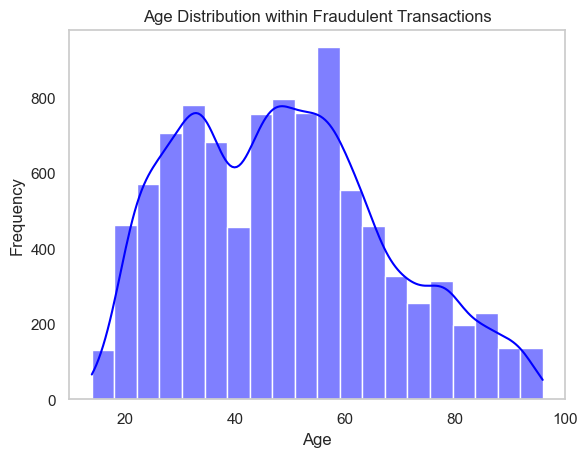

In [22]:
# Plotting the distribution of age within the fraudulent transactions
sns.histplot(fraudulent_data['age'], kde=True, color='blue', bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution within Fraudulent Transactions')
plt.grid(False)
plt.show()

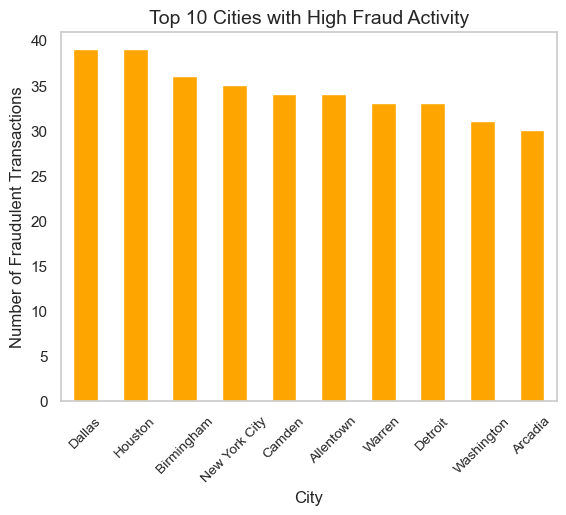

In [23]:
# Create a bar chart for the top 10 cities with high fraud activity
fraudulent_data['city'].value_counts().head(10).plot(kind='bar', color='orange')

plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Top 10 Cities with High Fraud Activity', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.grid(False)
plt.show()

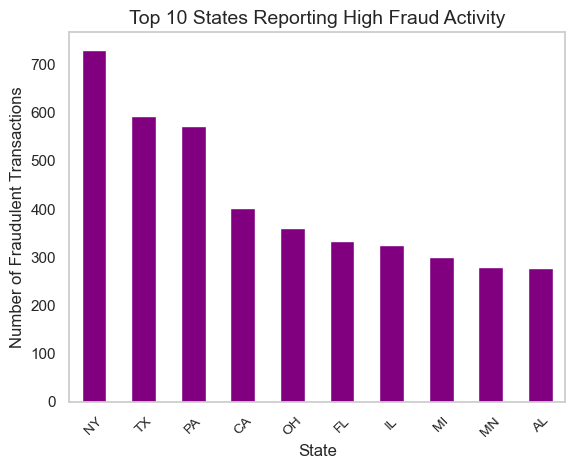

In [24]:
# Create a bar chart for the top 10 states with high fraud activity
fraudulent_data['state'].value_counts().head(10).plot(kind='bar', color='purple')

plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Top 10 States Reporting High Fraud Activity', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.grid(False)
plt.show()

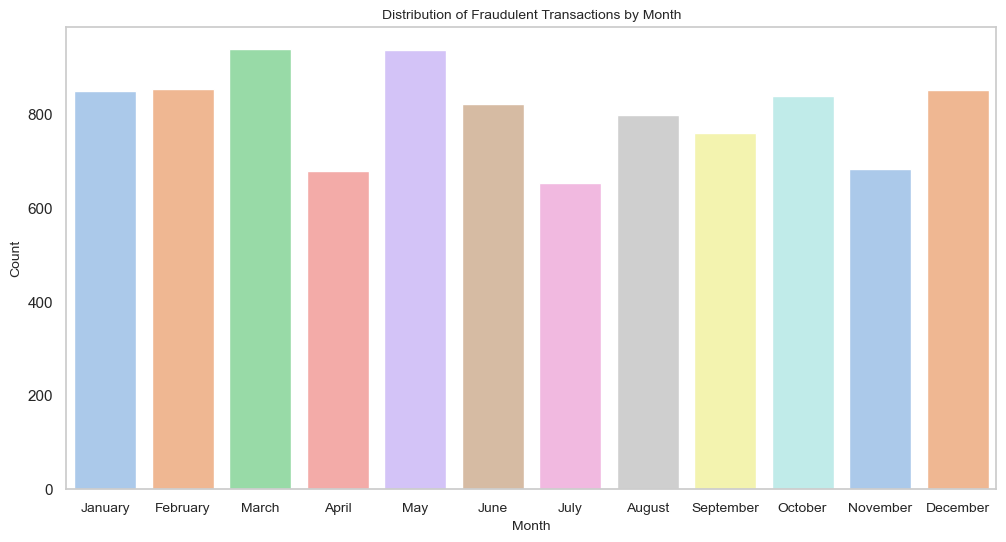

In [25]:
# Create a countplot to visualize the distribution
fraudulent_data['month'] = (fraudulent_data['trans_date_trans_time']).dt.month

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=fraudulent_data, x='month', palette='pastel')

plt.xlabel('Month',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Distribution of Fraudulent Transactions by Month',fontsize=10)

# Getting unique month values
unique_months = fraudulent_data['month'].unique()
unique_months.sort()

# Creating a dictionary to map month values to month names using list comprehension
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_name_mapping = {i: month_names[i - 1] for i in unique_months}

ax.set_xticklabels(unique_months)
ax.set_xticklabels([month_name_mapping[i] for i in unique_months], fontsize=10)

plt.grid(False)
plt.show()

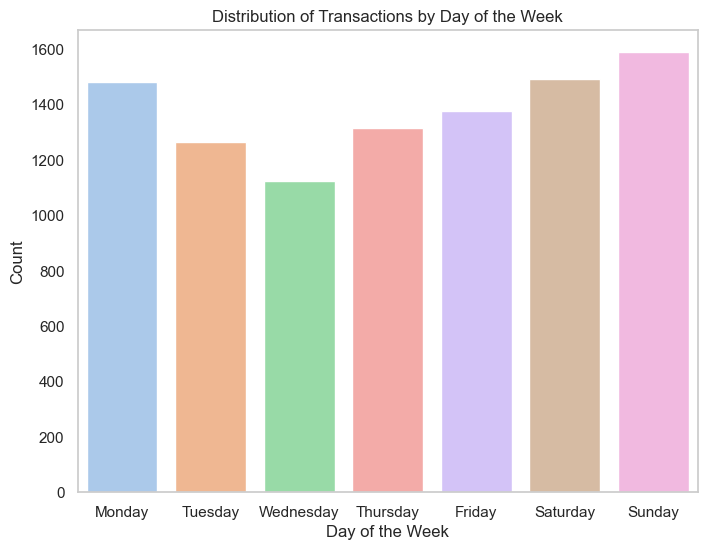

In [26]:
# Create a countplot to visualize the distribution
fraudulent_data['day'] = (fraudulent_data['trans_date_trans_time']).dt.dayofweek

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=fraudulent_data, x='day', palette='pastel')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Day of the Week')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(day_names)

plt.grid(False)
plt.show()

In [27]:
# Correlation Analysis
numeric_columns = df.select_dtypes(include='number')
correlations = numeric_columns.corr()['is_fraud'].sort_values(ascending=False)
correlations

is_fraud      1.000000
amt           0.209308
age           0.010927
lat           0.002904
merch_lat     0.002778
long          0.001022
merch_long    0.000999
city_pop      0.000325
cc_num       -0.001125
zip          -0.002190
unix_time    -0.013329
Name: is_fraud, dtype: float64

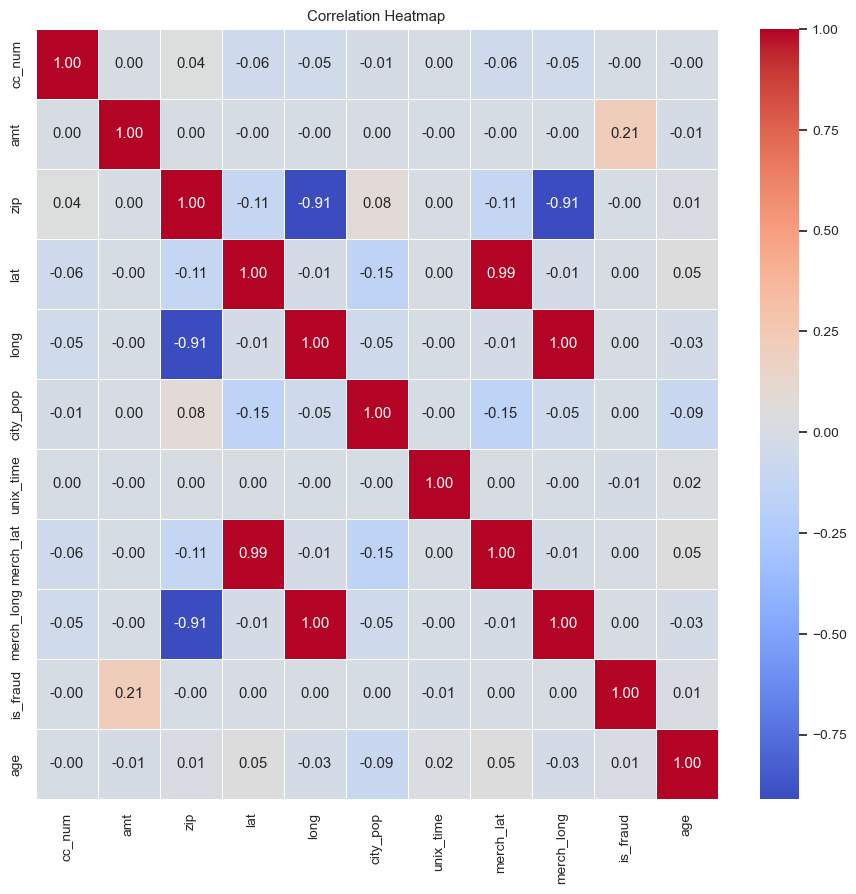

In [28]:
# Create a heatmap for the correlation
sns.set(font_scale=0.9)
plt.figure(figsize=(11, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=.5,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The transaction amount has a positive correlation of approximately 0.21 with is_fraud.

Other features like city_pop, lat, merch_lat, and so on have very weak correlations with is_fraud. Their absolute values are close to 0, suggesting little linear relationship with the target variable.

### Feature Engineering

In [29]:
# Create copies of the original DataFrames
df_copy = df.copy()

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [31]:
# Bin the 'age' feature into groups to create a new feature 'age_group'
bins = [0, 18, 40, 60, 100]
labels = ['0-18', '19-40', '41-60', '61+']
df_copy['age_group'] = pd.cut(df_copy['age'], bins=bins, labels=labels)

In [32]:
# One-hot encoding 'age_group' and converting into integer datatype
df_copy = pd.get_dummies(df_copy, columns=['age_group'], prefix=['age_group'], drop_first=False)
df_copy[['age_group_0-18', 'age_group_19-40', 'age_group_41-60', 'age_group_61+']] = df_copy[['age_group_0-18', 'age_group_19-40', 'age_group_41-60', 'age_group_61+']].astype(int)

In [33]:
# Creating a function to extract and create month, day, hour, time_elapsed features
def timeline_extract(df):
    df['month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month
    df['day'] = pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
    df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
    df['time_elapsed'] = pd.to_datetime(df['trans_date_trans_time']).diff()
        
    return df

In [34]:
df_copy = timeline_extract(df_copy)

In [35]:
# One-hot encoding timeline features and converting them into integer datatypes
df_copy = pd.get_dummies(df_copy, columns=['month'], prefix=['month'], drop_first=False)
df_copy = pd.get_dummies(df_copy, columns=['day'], prefix=['day'], drop_first=False)
df_copy = pd.get_dummies(df_copy, columns=['hour'], prefix=['hour'], drop_first=False)
df_copy[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']] = df_copy[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']].astype(int)
df_copy[['day_0','day_1','day_2','day_3','day_4','day_5','day_6']] = df_copy[['day_0','day_1','day_2','day_3','day_4','day_5','day_6']].astype(int)
df_copy[['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23']] = df_copy[['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23']].astype(int)
df_copy['time_elapsed'] = df_copy['time_elapsed'].fillna(pd.Timedelta(seconds=0))
df_copy['time_elapsed'] = df_copy['time_elapsed'].dt.total_seconds().astype(int)

In [36]:
# Creating a function to one-hot encode gender and converting into integer datatype
def gender_encoded(df):
    df = pd.get_dummies(df, columns=['gender'], prefix=['gender'], drop_first=False)
    df[['gender_F', 'gender_M']] = df[['gender_F', 'gender_M']].astype(int)
    
    return df

In [37]:
df_copy = gender_encoded(df_copy)

In [38]:
# Creating a function to one-hot encode category and converting into integer datatype
def category_encoded(df):
    category_dummies = df['category'].str.get_dummies()
    df = pd.concat([df, category_dummies], axis=1)
    
    return df

In [39]:
df_copy = category_encoded(df_copy)

In [40]:
df_copy.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,street,city,state,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,0,0,0,0,0,1,0,0,0,0


In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 87 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   street                 object        
 8   city                   object        
 9   state                  object        
 10  zip                    int64         
 11  lat                    float64       
 12  long                   float64       
 13  city_pop               int64         
 14  job                    object        
 15  dob                    datetime64[ns]
 16  trans_num              object        
 17  unix_time              int64         
 18  merch_lat             

In [42]:
df_copy['city'].unique()

array(['Moravian Falls', 'Orient', 'Malad City', 'Boulder', 'Doe Hill',
       'Dublin', 'Holcomb', 'Edinburg', 'Manor', 'Clarksville',
       'Clarinda', 'Shenandoah Junction', 'Saint Petersburg', 'Grenada',
       'High Rolls Mountain Park', 'Harrington Park', 'Lahoma',
       'Carlisle', 'Harborcreek', 'Elizabeth', 'Methuen', 'Moulton',
       'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus', 'Freedom',
       'Honokaa', 'Valentine', 'Westfir', 'Tiptonville', 'Republic',
       'Baton Rouge', 'Washington', 'Big Creek', 'Bellmore', 'Florence',
       'Allentown', 'Moriches', 'Esbon', 'Chatham', 'Thompson',
       'North Prairie', 'Laredo', 'Grant', 'Conway', 'New Goshen',
       'Sunflower', 'Enola', 'Roosevelt', 'Pointe Aux Pins', 'Dallas',
       'Jay', 'North Tonawanda', 'Athena', 'Chester', 'Elkhart',
       'Surrency', 'Arcadia', 'Gaithersburg', 'Bowdoin', 'Heart Butte',
       'San Jose', 'Rumely', 'Cranks', 'Ravenna', 'Utica', 'Uledi',
       'Naples', 'Thida', 'Parks', 'C

In [43]:
df_copy['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

Due to the large number of unique values in city and state features, no feature engineering was done on these categorical features.

In [44]:
df_copy.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group_0-18',
       'age_group_19-40', 'age_group_41-60', 'age_group_61+', 'time_elapsed',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'gender_F', 'gender_M',
       'entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitnes

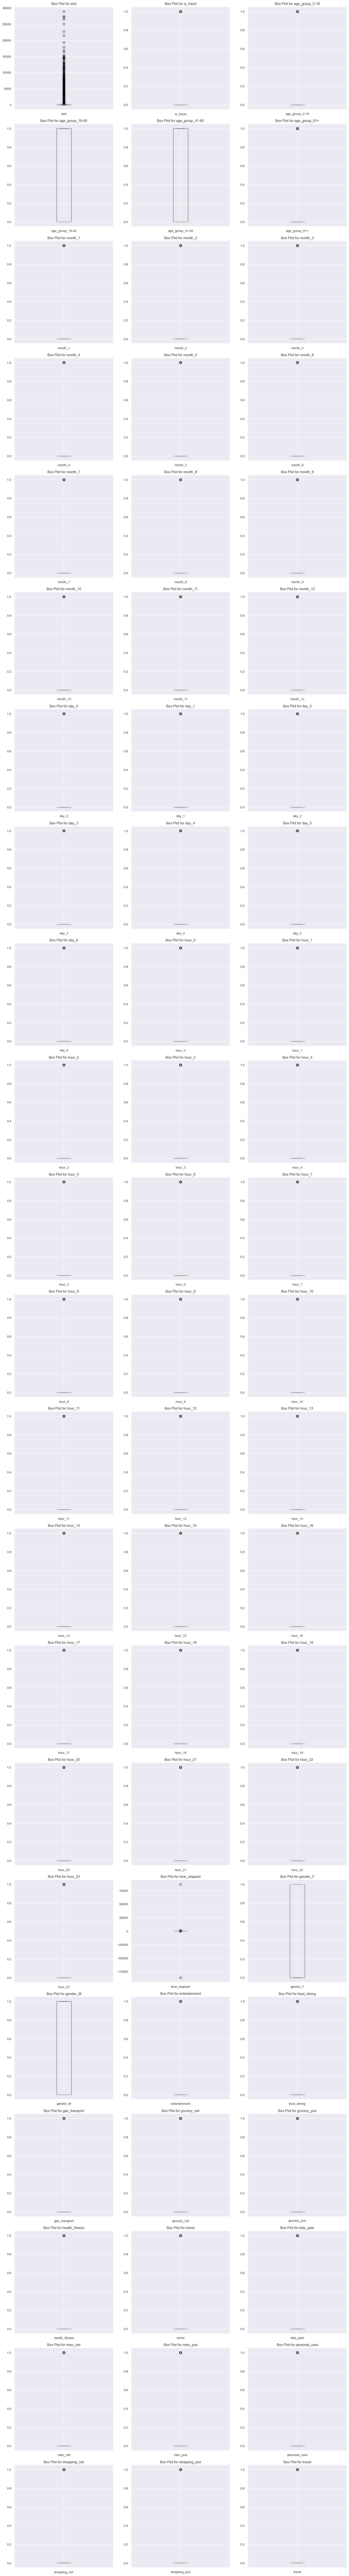

In [45]:
# Create a function to identify and plot the ouliers
def visualize_outliers_subplots(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

    for i, col in enumerate(columns):
        # Calculate the row and column index for the subplot
        row_index = i // 3
        col_index = i % 3
        
        # Create a box plot for each numerical column in the specified subplot
        df.boxplot(column=col, ax=axes[row_index, col_index])
        
        # Set the title for each subplot
        axes[row_index, col_index].set_title(f'Box Plot for {col}')
    
    plt.tight_layout()

# Specify the numerical columns for visualization
numerical_columns = ['amt', 'is_fraud', 'age_group_0-18', 'age_group_19-40',
       'age_group_41-60', 'age_group_61+', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'time_elapsed', 'gender_F', 'gender_M', 'entertainment', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel']

# Call the function to visualize outliers in subplots
visualize_outliers_subplots(df_copy, numerical_columns)
plt.tight_layout()
plt.show()

In [46]:
# Identify rows with outliers in the 'amt' column
Q1 = df_copy['amt'].quantile(0.25)
Q3 = df_copy['amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows directly to meet both conditions and creating new dataframe with filtered values
filtered_rows = df_copy[
    ((df_copy['amt'] >= lower_bound) & (df_copy['amt'] <= upper_bound)) |
    (df_copy['is_fraud'] != 0)
]
new_df = df_copy[df_copy.index.isin(filtered_rows.index)]

In [47]:
# Checking unique values from time_elapsed to identify outliers
new_df['time_elapsed'].unique()

array([     0,     26,     25,    110,     62,     34,     10,     22,
           30,      3,     31,     96,     17,     16,     80,     89,
          159,     24,      1,    128,     77,     12,     18,      5,
           57,    108,     83,     11,     98,     50,     32,     64,
           19,    122,     46,     20,    124,     15,      6,      4,
            2,      8,     45,     41,     72,     42,     23,     65,
           97,     76,     82,     13,     51,     54,     60,     28,
           37,    115,     78,    129,    189,     44,    111,     52,
            9,    139,    117,     56,     35,     74,    101,     14,
           71,     33,     66,     53,     29,     47,     49,    123,
           63,     55,    135,     84,     38,    126,     59,    166,
           39,     48,     43,    153,    102,     27,     40,    156,
          147,     92,     73,    113,    164,    148,    132,     36,
           67,     95,    184,    183,    167,    214,     68,    107,
      

In [48]:
# Dropping outliers values from time_elapsed
high_values = [-86266, 86555]

# Filtering rows where 'time_elapsed' outliers (high_values) are excluded
new_df = new_df[~((new_df['time_elapsed'].isin(high_values)) & (new_df['is_fraud'] == 0))]

In [49]:
new_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group_0-18',
       'age_group_19-40', 'age_group_41-60', 'age_group_61+', 'time_elapsed',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'gender_F', 'gender_M',
       'entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitnes

In [50]:
# Dropping non-numerical and non-revelant features
numerical_df = new_df.select_dtypes(include=['number'])
columns_to_drop = ['cc_num', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age']
numerical_df = numerical_df.drop(columns_to_drop, axis=1)

In [51]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1764657 entries, 0 to 1852393
Data columns (total 66 columns):
 #   Column           Dtype  
---  ------           -----  
 0   amt              float64
 1   is_fraud         int64  
 2   age_group_0-18   int64  
 3   age_group_19-40  int64  
 4   age_group_41-60  int64  
 5   age_group_61+    int64  
 6   time_elapsed     int64  
 7   month_1          int64  
 8   month_2          int64  
 9   month_3          int64  
 10  month_4          int64  
 11  month_5          int64  
 12  month_6          int64  
 13  month_7          int64  
 14  month_8          int64  
 15  month_9          int64  
 16  month_10         int64  
 17  month_11         int64  
 18  month_12         int64  
 19  day_0            int64  
 20  day_1            int64  
 21  day_2            int64  
 22  day_3            int64  
 23  day_4            int64  
 24  day_5            int64  
 25  day_6            int64  
 26  hour_0           int64  
 27  hour_1           

### Model Baseline

In [53]:
# Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve, auc

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

Baseline Model - Logistic Regression (no scaling or random oversampling)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       1.00      0.66      0.80      2937

    accuracy                           1.00    529398
   macro avg       1.00      0.83      0.90    529398
weighted avg       1.00      1.00      1.00    529398

Logistic Regression Confusion Matrix:
[[526460      1]
 [   986   1951]]
Logistic Regression AUC: 0.9470943533924479


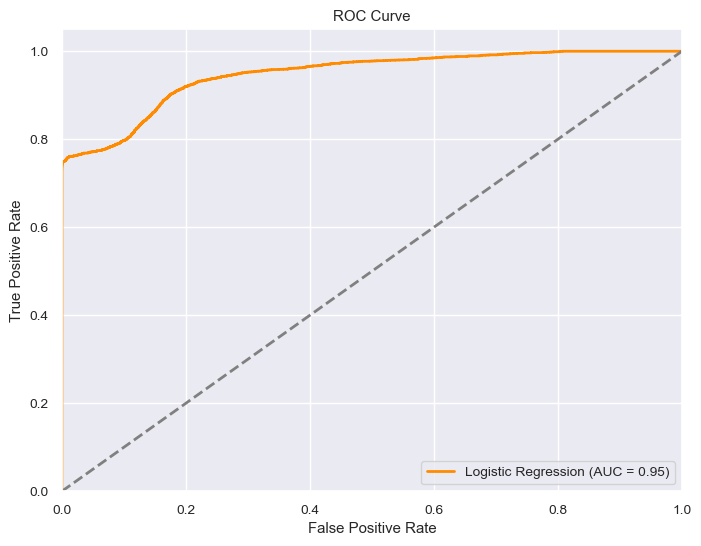

CPU times: user 1min 2s, sys: 41.6 s, total: 1min 44s
Wall time: 11.1 s


In [54]:
%%time
# Logistic Regression Model - Baseline
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC Score
lr_y_prob = lr.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_y_prob)
print("Logistic Regression AUC:", lr_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, lr_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Baseline Model - Decision Tree (no scaling or random oversampling)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       0.84      0.86      0.85      2937

    accuracy                           1.00    529398
   macro avg       0.92      0.93      0.92    529398
weighted avg       1.00      1.00      1.00    529398

Decision Tree Confusion Matrix:
[[525987    474]
 [   414   2523]]
Decision Tree AUC: 0.9290697424874655


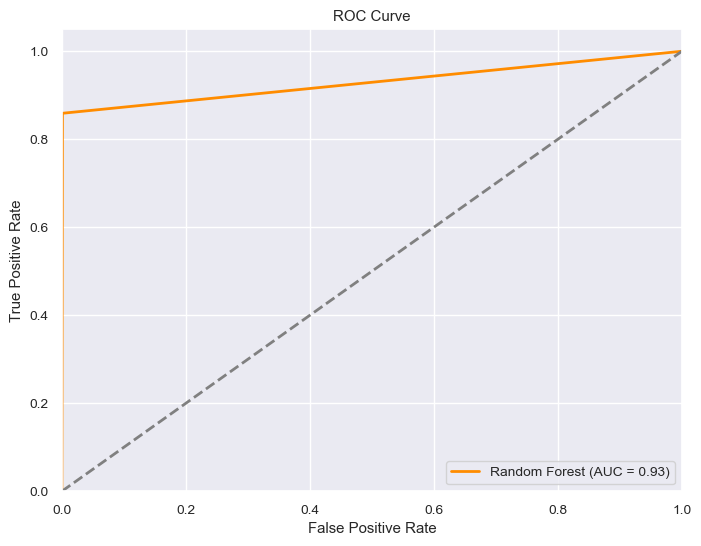

CPU times: user 4.58 s, sys: 447 ms, total: 5.03 s
Wall time: 4.95 s


In [55]:
%%time
# Decision Tree Model - Baseline
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model Evaluation - Decision Tree
dt_y_pred = dt_model.predict(X_test)

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Confusion Matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

# AUC-ROC Score
dt_y_prob = dt_model.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_y_prob)
print("Decision Tree AUC:", dt_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Baseline Model - Random Forest (no scaling or random oversampling)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       1.00      0.83      0.90      2937

    accuracy                           1.00    529398
   macro avg       1.00      0.91      0.95    529398
weighted avg       1.00      1.00      1.00    529398

Random Forest Confusion Matrix:
[[526455      6]
 [   508   2429]]
Random Forest AUC: 0.9776174810230599


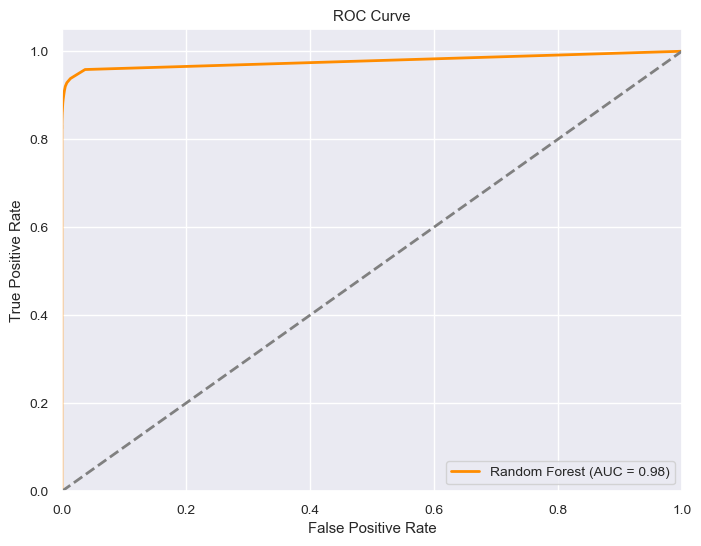

CPU times: user 1min 14s, sys: 2.46 s, total: 1min 16s
Wall time: 1min 16s


In [56]:
%%time
# Random Forest Model - Baseline
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation - Random Forest
rf_y_pred = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# AUC-ROC Score
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_prob)
print("Random Forest AUC:", rf_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Model Tuning

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    526461
           1       0.05      0.90      0.09      2937

    accuracy                           0.90    529398
   macro avg       0.52      0.90      0.52    529398
weighted avg       0.99      0.90      0.94    529398

Logistic Regression Confusion Matrix:
[[473477  52984]
 [   297   2640]]
Logistic Regression AUC: 0.9637305832046849


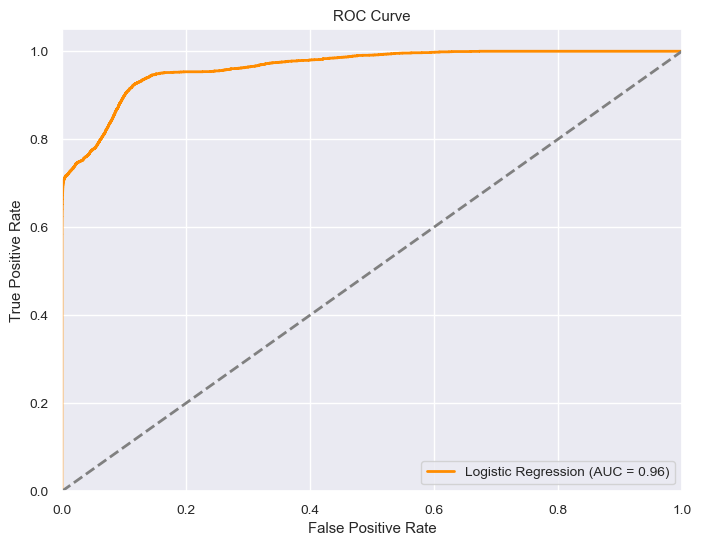

CPU times: user 1min 56s, sys: 1min 11s, total: 3min 8s
Wall time: 20.3 s


In [57]:
%%time
# Logistic Regression Model using Scaling and Random Oversampling
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply random oversampling to address class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Create and train a logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC Score
lr_y_prob = lr.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_y_prob)
print("Logistic Regression AUC:", lr_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, lr_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       0.86      0.85      0.86      2937

    accuracy                           1.00    529398
   macro avg       0.93      0.93      0.93    529398
weighted avg       1.00      1.00      1.00    529398

Decision Tree Confusion Matrix:
[[526059    402]
 [   431   2506]]
Decision Tree AUC: 0.9262440139854281


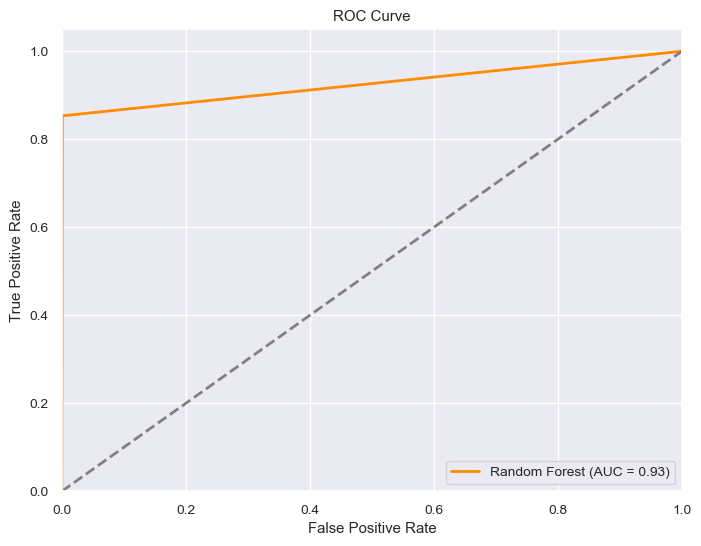

CPU times: user 8.49 s, sys: 875 ms, total: 9.37 s
Wall time: 9.28 s


In [58]:
%%time
# Decision Tree Model using Scaling and Random Oversampling
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation - Decision Tree
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
dt_y_pred = dt_model.predict(X_test_scaled)

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Confusion Matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

# AUC-ROC Score
dt_y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]
dt_auc = roc_auc_score(y_test, dt_y_prob)
print("Decision Tree AUC:", dt_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       0.97      0.83      0.90      2937

    accuracy                           1.00    529398
   macro avg       0.98      0.92      0.95    529398
weighted avg       1.00      1.00      1.00    529398

Random Forest Confusion Matrix:
[[526379     82]
 [   487   2450]]
Random Forest AUC: 0.9806082537408453


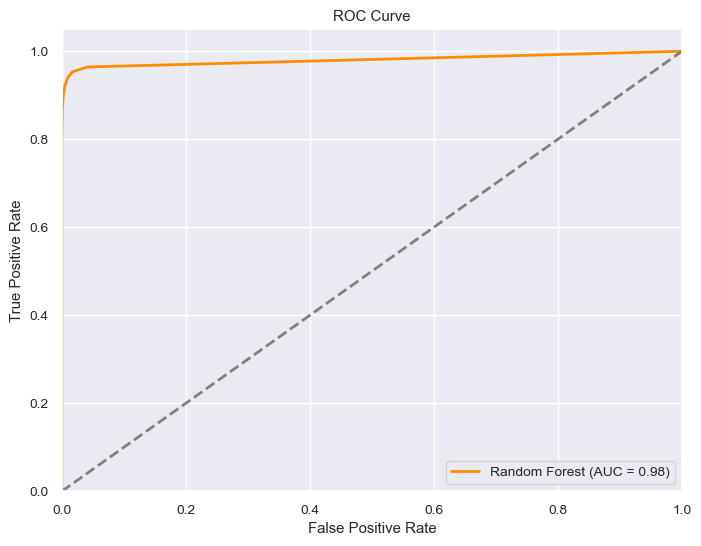

CPU times: user 3min 18s, sys: 10.8 s, total: 3min 28s
Wall time: 3min 23s


In [59]:
%%time
# Random Forest Model using Scaling and SMOTE
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model Building - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation - Random Forest
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
rf_y_pred = rf_model.predict(X_test_scaled)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# AUC-ROC Score
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_prob)
print("Random Forest AUC:", rf_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       0.98      0.83      0.90      2937

    accuracy                           1.00    529398
   macro avg       0.99      0.92      0.95    529398
weighted avg       1.00      1.00      1.00    529398

Random Forest Confusion Matrix:
[[526407     54]
 [   486   2451]]
Random Forest AUC: 0.9802531102710642


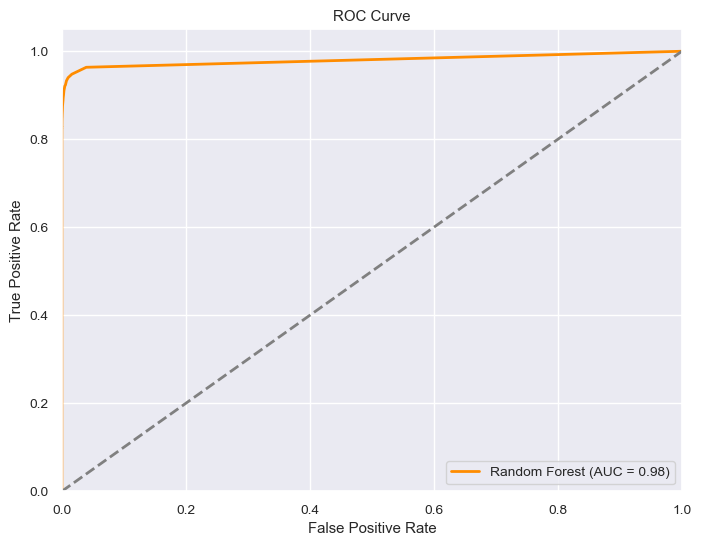

CPU times: user 2min 27s, sys: 5.41 s, total: 2min 32s
Wall time: 2min 32s


In [60]:
%%time
# Random Forest Model using Scaling and Random Oversampling
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation - Random Forest
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
rf_y_pred = rf_model.predict(X_test_scaled)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# AUC-ROC Score
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_prob)
print("Random Forest AUC:", rf_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# # Create a countplot to visualize the distribution
# fraudulent_data['month'] = (fraudulent_data['trans_date_trans_time']).dt.month

# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 6))
# ax = sns.countplot(data=fraudulent_data, x='month', palette='pastel')

# plt.xlabel('Month',fontsize=10)
# plt.ylabel('Count',fontsize=10)
# plt.title('Distribution of Fraudulent Transactions by Month',fontsize=10)

# # Getting unique month values
# unique_months = fraudulent_data['month'].unique()
# unique_months.sort()

# # Creating a dictionary to map month values to month names using list comprehension
# month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# month_name_mapping = {i: month_names[i - 1] for i in unique_months}

# ax.set_xticklabels(unique_months)
# ax.set_xticklabels([month_name_mapping[i] for i in unique_months], fontsize=10)

# plt.grid(False)
# plt.show()

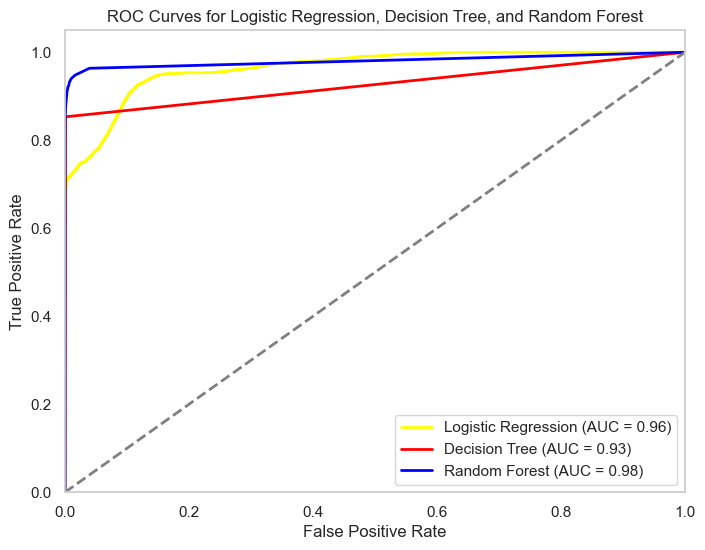

In [61]:
# Compute ROC curve and AUC for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_prob)
lr_auc = auc(lr_fpr, lr_tpr)

# Compute ROC curve and AUC for Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_prob)
dt_auc = auc(dt_fpr, dt_tpr)

# Compute ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot the ROC curves for all models on a single chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='yellow', lw=2, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, color='red', lw=2, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, Decision Tree, and Random Forest')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       0.98      0.83      0.90      2937

    accuracy                           1.00    529398
   macro avg       0.99      0.92      0.95    529398
weighted avg       1.00      1.00      1.00    529398

Random Forest Confusion Matrix:
[[526401     60]
 [   488   2449]]
Random Forest AUC: 0.9826441233008177


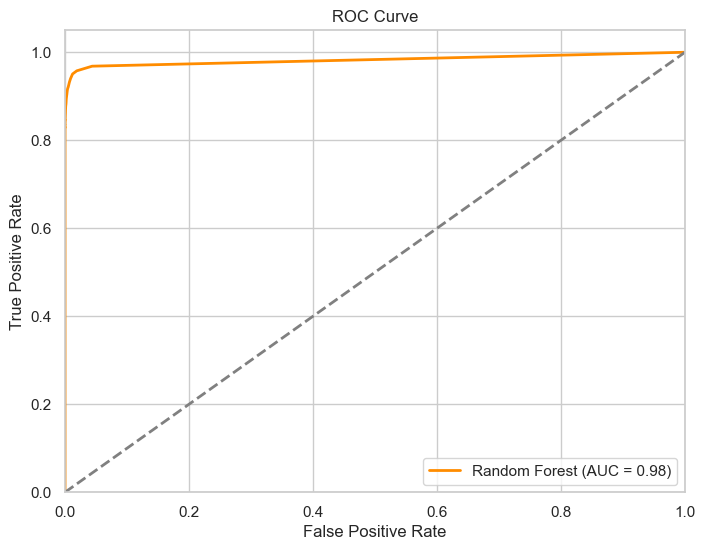

CPU times: user 3min 11s, sys: 6.82 s, total: 3min 18s
Wall time: 3min 18s


In [62]:
%%time
# Hyperparameter tuning using class weights in Random Forest Model
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Random Forest with custom class weights and max_features 'sqrt'
class_weights = {0: 1, 1: 2}  # Class weights: 0->1, 1->10
rf_model = RandomForestClassifier(
    n_estimators=128,
    random_state=42,
    class_weight=class_weights,  # Set custom class weights
    max_features='sqrt'          # Maximum number of features to consider at each split
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation - Random Forest
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
rf_y_pred = rf_model.predict(X_test_scaled)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# AUC-ROC Score
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_prob)
print(f"Random Forest AUC: {rf_auc}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Grid Search

In [64]:
%%time
# Define the parameter grid for the Random Forest
param_grid = {
    'n_estimators': [50, 100],      # Number of trees in the forest
    'max_depth': [None, 10],    # Maximum depth of the trees
    'min_samples_split': [2, 5],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]      # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding AUC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Get the best model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
rf_y_pred = best_rf_model.predict(X_test_scaled)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# AUC-ROC Score
rf_y_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_prob)
print("Random Forest AUC:", rf_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

KeyboardInterrupt: 

# Neural Network

In [63]:
# Importing Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu

Epoch 1/10
15357/15357 - 8s - loss: 0.0440 - accuracy: 0.9830 - val_loss: 0.0332 - val_accuracy: 0.9904 - 8s/epoch - 490us/step
Epoch 2/10
15357/15357 - 7s - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0129 - val_accuracy: 0.9989 - 7s/epoch - 472us/step
Epoch 3/10
15357/15357 - 7s - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0217 - val_accuracy: 0.9947 - 7s/epoch - 469us/step
Epoch 4/10
15357/15357 - 7s - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0079 - val_accuracy: 0.9991 - 7s/epoch - 474us/step
Epoch 5/10
15357/15357 - 7s - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0064 - val_accuracy: 0.9994 - 7s/epoch - 473us/step
Epoch 6/10
15357/15357 - 7s - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0032 - val_accuracy: 0.9999 - 7s/epoch - 479us/step
Epoch 7/10
15357/15357 - 7s - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0052 - val_accuracy: 0.9990 - 7s/epoch - 482us/step
Epoch 8/10
15357/15357 - 7s - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0068 - val_accuracy: 0.9991 

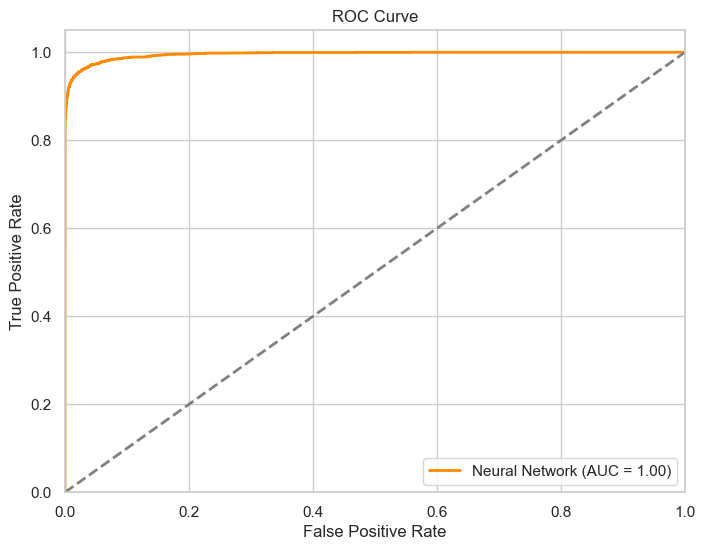

CPU times: user 1min 39s, sys: 1min 9s, total: 2min 48s
Wall time: 1min 24s


In [64]:
%%time
# Adam with 10 epochs
# Define features (X) and target variable (y)
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Neural Network with 2 hidden layers and ReLU activation
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation=relu))
nn_model.add(Dense(64, activation=relu))
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

# Model Evaluation - Neural Network
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
nn_y_pred = nn_model.predict(X_test_scaled)
nn_y_pred = (nn_y_pred > 0.5)  # Threshold predictions

# Classification Report
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred))

# Confusion Matrix
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_y_pred))

# AUC-ROC Score
nn_y_prob = nn_model.predict(X_test_scaled)
nn_auc = roc_auc_score(y_test, nn_y_prob)
print("Neural Network AUC:", nn_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, nn_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/100
15357/15357 - 8s - loss: 0.0465 - accuracy: 0.9819 - val_loss: 0.0179 - val_accuracy: 0.9962 - 8s/epoch - 489us/step
Epoch 2/100
15357/15357 - 7s - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0112 - val_accuracy: 0.9986 - 7s/epoch - 480us/step
Epoch 3/100
15357/15357 - 7s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0213 - val_accuracy: 0.9949 - 7s/epoch - 476us/step
Epoch 4/100
15357/15357 - 7s - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0231 - val_accuracy: 0.9942 - 7s/epoch - 459us/step
Epoch 5/100
15357/15357 - 7s - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0196 - val_accuracy: 0.9957 - 7s/epoch - 473us/step
Epoch 6/100
15357/15357 - 7s - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0104 - val_accuracy: 0.9983 - 7s/epoch - 467us/step
Epoch 7/100
15357/15357 - 7s - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0083 - val_accuracy: 0.9991 - 7s/epoch - 466us/step
Epoch 8/100
15357/15357 - 7s - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0082 - val_accuracy:

Epoch 64/100
15357/15357 - 7s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994 - 7s/epoch - 484us/step
Epoch 65/100
15357/15357 - 7s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9987 - 7s/epoch - 472us/step
Epoch 66/100
15357/15357 - 7s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9994 - 7s/epoch - 486us/step
Epoch 67/100
15357/15357 - 7s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0014 - val_accuracy: 0.9996 - 7s/epoch - 475us/step
Epoch 68/100
15357/15357 - 7s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9992 - 7s/epoch - 487us/step
Epoch 69/100
15357/15357 - 8s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0016 - val_accuracy: 0.9995 - 8s/epoch - 489us/step
Epoch 70/100
15357/15357 - 7s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 5.5411e-04 - val_accuracy: 0.9998 - 7s/epoch - 482us/step
Epoch 71/100
15357/15357 - 7s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 3.6019e-04

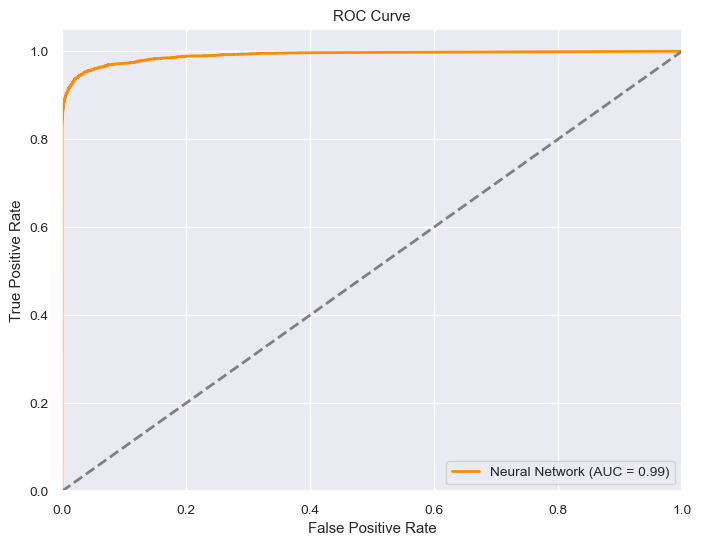

CPU times: user 15min 22s, sys: 10min 44s, total: 26min 6s
Wall time: 12min 30s


In [67]:
%%time
# Adam with 100 epochs
# Define features (X) and target variable (y)
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Neural Network with 2 hidden layers and ReLU activation
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation=relu))
nn_model.add(Dense(64, activation=relu))
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=128, validation_split=0.2, verbose=2)

# Model Evaluation - Neural Network
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
nn_y_pred = nn_model.predict(X_test_scaled)
nn_y_pred = (nn_y_pred > 0.5)  # Threshold predictions

# Classification Report
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred))

# Confusion Matrix
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_y_pred))

# AUC-ROC Score
nn_y_prob = nn_model.predict(X_test_scaled)
nn_auc = roc_auc_score(y_test, nn_y_prob)
print("Neural Network AUC:", nn_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, nn_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/10
15357/15357 - 6s - loss: 0.0511 - accuracy: 0.9799 - val_loss: 0.0566 - val_accuracy: 0.9810 - 6s/epoch - 385us/step
Epoch 2/10
15357/15357 - 6s - loss: 0.0258 - accuracy: 0.9907 - val_loss: 0.0190 - val_accuracy: 0.9962 - 6s/epoch - 365us/step
Epoch 3/10
15357/15357 - 6s - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0153 - val_accuracy: 0.9982 - 6s/epoch - 364us/step
Epoch 4/10
15357/15357 - 6s - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0233 - val_accuracy: 0.9962 - 6s/epoch - 369us/step
Epoch 5/10
15357/15357 - 6s - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0423 - val_accuracy: 0.9872 - 6s/epoch - 365us/step
Epoch 6/10
15357/15357 - 6s - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0066 - val_accuracy: 0.9991 - 6s/epoch - 364us/step
Epoch 7/10
15357/15357 - 6s - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0081 - val_accuracy: 0.9995 - 6s/epoch - 369us/step
Epoch 8/10
15357/15357 - 6s - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0094 - val_accuracy: 0.9989 

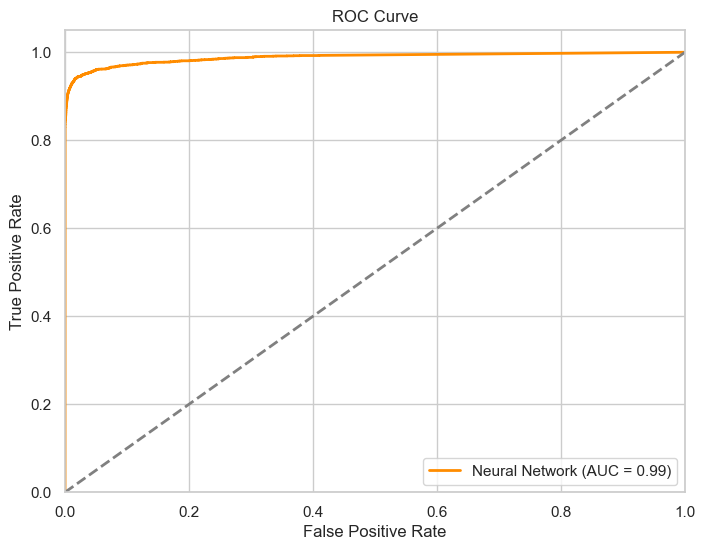

CPU times: user 1min 16s, sys: 12.8 s, total: 1min 29s
Wall time: 1min 7s


In [65]:
%%time
# RMSprop with 10 epochs
# Define features (X) and target variable (y)
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Neural Network with 2 hidden layers and ReLU activation
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation=relu))
nn_model.add(Dense(64, activation=relu))
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

# Model Evaluation - Neural Network
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
nn_y_pred = nn_model.predict(X_test_scaled)
nn_y_pred = (nn_y_pred > 0.3)  # Threshold predictions

# Classification Report
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred))

# Confusion Matrix
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_y_pred))

# AUC-ROC Score
nn_y_prob = nn_model.predict(X_test_scaled)
nn_auc = roc_auc_score(y_test, nn_y_prob)
print("Neural Network AUC:", nn_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, nn_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/100
15357/15357 - 6s - loss: 0.0503 - accuracy: 0.9803 - val_loss: 0.0286 - val_accuracy: 0.9916 - 6s/epoch - 379us/step
Epoch 2/100
15357/15357 - 6s - loss: 0.0248 - accuracy: 0.9912 - val_loss: 0.0101 - val_accuracy: 0.9985 - 6s/epoch - 365us/step
Epoch 3/100
15357/15357 - 6s - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0104 - val_accuracy: 0.9995 - 6s/epoch - 376us/step
Epoch 4/100
15357/15357 - 6s - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0165 - val_accuracy: 0.9982 - 6s/epoch - 363us/step
Epoch 5/100
15357/15357 - 6s - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0152 - val_accuracy: 0.9990 - 6s/epoch - 366us/step
Epoch 6/100
15357/15357 - 6s - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0165 - val_accuracy: 0.9962 - 6s/epoch - 371us/step
Epoch 7/100
15357/15357 - 6s - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0347 - val_accuracy: 0.9878 - 6s/epoch - 366us/step
Epoch 8/100
15357/15357 - 6s - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0112 - val_accuracy:

15357/15357 - 6s - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.0274 - val_accuracy: 0.9949 - 6s/epoch - 382us/step
Epoch 65/100
15357/15357 - 6s - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.2398 - val_accuracy: 0.9394 - 6s/epoch - 376us/step
Epoch 66/100
15357/15357 - 6s - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0110 - val_accuracy: 0.9979 - 6s/epoch - 377us/step
Epoch 67/100
15357/15357 - 6s - loss: 0.0293 - accuracy: 0.9922 - val_loss: 0.0212 - val_accuracy: 0.9951 - 6s/epoch - 374us/step
Epoch 68/100
15357/15357 - 6s - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.0145 - val_accuracy: 0.9975 - 6s/epoch - 376us/step
Epoch 69/100
15357/15357 - 6s - loss: 0.0298 - accuracy: 0.9921 - val_loss: 0.0156 - val_accuracy: 0.9960 - 6s/epoch - 375us/step
Epoch 70/100
15357/15357 - 6s - loss: 0.0301 - accuracy: 0.9922 - val_loss: 0.0101 - val_accuracy: 0.9971 - 6s/epoch - 374us/step
Epoch 71/100
15357/15357 - 6s - loss: 0.0300 - accuracy: 0.9923 - val_loss: 0.0113 - val_accuracy: 0.99

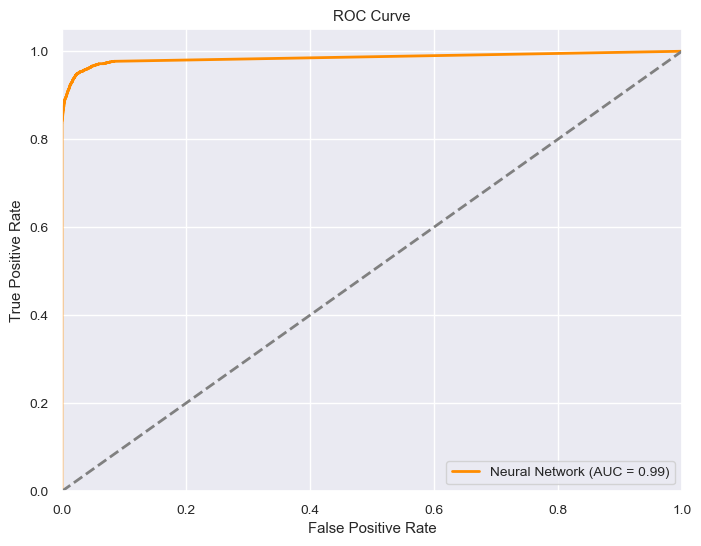

CPU times: user 11min 16s, sys: 1min 57s, total: 13min 14s
Wall time: 9min 48s


In [69]:
%%time
# RMSprop and 100 epochs
# Define features (X) and target variable (y)
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Neural Network with 2 hidden layers and ReLU activation
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation=relu))
nn_model.add(Dense(64, activation=relu))
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=128, validation_split=0.2, verbose=2)

# Model Evaluation - Neural Network
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
nn_y_pred = nn_model.predict(X_test_scaled)
nn_y_pred = (nn_y_pred > 0.3)  # Threshold predictions

# Classification Report
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred))

# Confusion Matrix
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_y_pred))

# AUC-ROC Score
nn_y_prob = nn_model.predict(X_test_scaled)
nn_auc = roc_auc_score(y_test, nn_y_prob)
print("Neural Network AUC:", nn_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, nn_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Model Interpretation

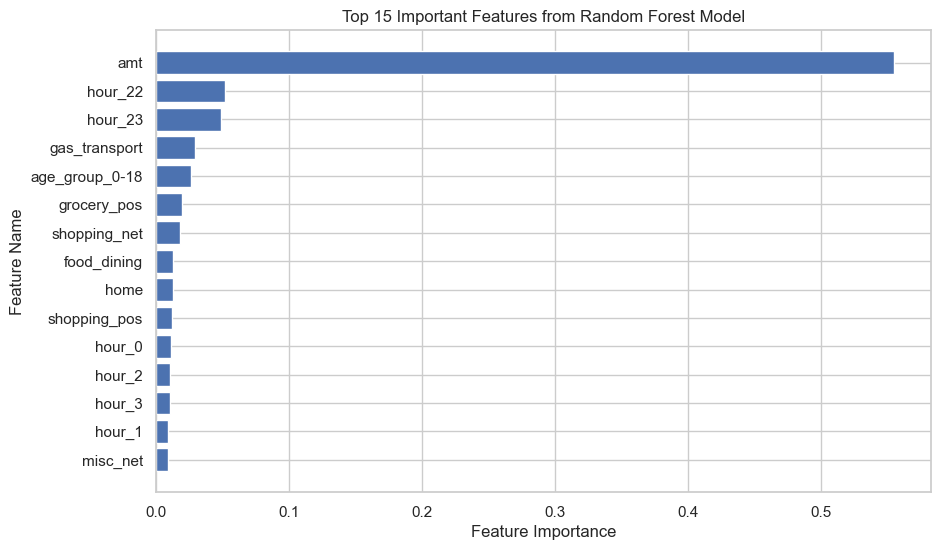

In [66]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Replace with the actual feature names

# Sort feature importances and feature names by importance in descending order
sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Extract the top 15 features and their importances using list comprehensions
top_features, top_importances = zip(*sorted_feature_importance[:15])

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 15 Important Features from Random Forest Model')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [67]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Display the top 15 features and their importances
for feature, importance in zip(top_features, top_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: amt, Importance: 0.5550
Feature: hour_22, Importance: 0.0519
Feature: hour_23, Importance: 0.0489
Feature: gas_transport, Importance: 0.0294
Feature: age_group_0-18, Importance: 0.0263
Feature: grocery_pos, Importance: 0.0193
Feature: shopping_net, Importance: 0.0177
Feature: food_dining, Importance: 0.0130
Feature: home, Importance: 0.0129
Feature: shopping_pos, Importance: 0.0121
Feature: hour_0, Importance: 0.0111
Feature: hour_2, Importance: 0.0104
Feature: hour_3, Importance: 0.0103
Feature: hour_1, Importance: 0.0087
Feature: misc_net, Importance: 0.0086


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526461
           1       0.98      0.83      0.90      2937

    accuracy                           1.00    529398
   macro avg       0.99      0.92      0.95    529398
weighted avg       1.00      1.00      1.00    529398

Random Forest Confusion Matrix:
[[526407     54]
 [   486   2451]]
Random Forest AUC: 0.9802531102710642


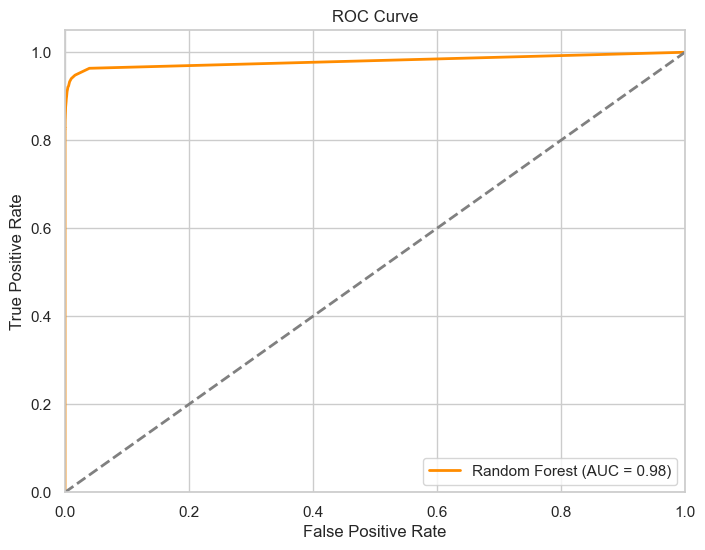

CPU times: user 2min 27s, sys: 5.63 s, total: 2min 33s
Wall time: 2min 33s


In [69]:
%%time
# Final Model Selected for Deployment
# Random Forest Model using Scaling and Random Oversampling
X = numerical_df.drop(columns=['is_fraud'])
y = numerical_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the 'amt' and 'time_elapsed' features from dataset
columns_to_scale = ['amt', 'time_elapsed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Concatenate the scaled columns with the remaining non-scaled columns
X_train_scaled = np.hstack((X_train_scaled, X_train.drop(columns=columns_to_scale).values))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Model Building - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation - Random Forest
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Scale the test data similarly
X_test_scaled = np.hstack((X_test_scaled, X_test.drop(columns=columns_to_scale).values))
rf_y_pred = rf_model.predict(X_test_scaled)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# AUC-ROC Score
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_prob)
print("Random Forest AUC:", rf_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

After experimentation, we concluded that the best optimal model for our business case is the Random Forest Model. This is achieved by scaling 'amt' and 'time_elapsed' features and using Random Oversampling on the training dataset to address class imbalance. Hence, hyperparameter tuning is only executed on the Random Forest Model. 

### Model Deployment

#### Create a File using Pickle within Jupyter

In [70]:
import pickle

# Step 1: Save the model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

# Step 2: Load the model from the saved file
with open(model_filename, 'rb') as file:
    loaded_rf_model = pickle.load(file)

# We can now use loaded_rf_model for making predictions.